# Problems to fix in day0 

In [778]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
sys.path.append("../lxmls-toolkit/")
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## numpy ndarray

This section gives several examples in order to facilitate the understanding of these objects.


The number of array dimensions in a numpy array is ndim.

If ```X``` is a L-ndim array then

- ```X[k]``` is a (L-1)-ndim array (sometimes called **slice** from ```X```)


### Some examples

#### "vector" in numpy
<pre>
    X = np.array([1,2,3])
    X.shape # this is (3,)
    X.ndim # this is 1
    
    array([1, 2, 3])
</pre>

 
  
#### "matrix" in numpy

<pre>
    X = np.array([[1,2,3]])
    X.shape # this is (1,3)
    X.ndim # this is 2

    array([[1, 2, 3]])
</pre>



#### "matrix" in numpy

- Our data will be represented in a (M,D) 2-ndim array
- Each row of the array is a **datapoint** or **sample** from the dataset
- If X is a 2-ndim array each X[k] is a 1-ndim array 

<pre>
    X = np.array([[1,2,3],[4,5,6]])
    X.shape # this is (2,3)
    X.ndim # this is 2

    array([[1, 2, 3],
           [4, 5, 6]])    
</pre>


#### "tensor" in numpy

- This could make sense when there is a spatial correlation. For example in the case of images.
- If X is a 3-ndim array each X[k] is a 2-ndim array 

<pre>
     X = np.array([[[1,2,4],[3,5,4]],[[10,20,40],[30,50,40]]])
     X.shape # this is (2,2,3)
     X.ndim # this is 2
    
     array([[[ 1,  2,  4],
            [ 3,  5,  4]],
            
            [[10, 20, 40],
             [30, 50, 40]]])
</pre>




In [779]:
X = np.array([[1,2,3],[4,5,6]])

In [780]:
X.ndim

2

In [781]:
X.shape

(2, 3)

In [782]:
X[0].shape

(3,)

In [783]:
X[0]

array([1, 2, 3])

In [784]:
X[0].ndim

1

# Computing numerical approximation of derivatives

In [807]:
def function(x):
    return x**2

def grad(x):
    return 2*x

def num_grad(function, x, h =0.0001):
    return (function(x + h) - function(x - h))/(2*h)

def check_grad(grad, numerical_grad, epsilon=0.00001):
    if np.linalg.norm(grad - numerical_grad) < epsilon:
        print "grad seems well implemented"
        
point = 10
g = grad(point)
print "\nexact gradient evaluated at", point, " takes value", g

num_g = num_grad(function, point)
print "\nnumerical gradient evaluated at", point, "takes value", g
print ""
check_grad(grad(10), num_grad(function,10))


exact gradient evaluated at 10  takes value 20

numerical gradient evaluated at 10 takes value 20

grad seems well implemented


# Computing numerical approximation of gradients

#### Toy example of gradient checking

- Let us consider $f(x) = x_1^2 + 10  x_2 + 10 $
- Compute the gradient of f
- Evaluate the gradient of f 
- Check that the true gradient is close to the numerical gradient in several points

In [786]:
def f(x):
    return x[0]**2 + 10*x[1]  + 10

def grad_f(x):
    return [2**x[0], 10]

import scipy
point = np.array([2,3])

print "gradient of f in point is", grad_f(point)
print "distance between numerical and real gradient is ", scipy.optimize.check_grad(f, grad_f, point)

gradient of f in point is [4, 10]
distance between numerical and real gradient is  0.0


#### Toy example gradient checking function with parameters

In [808]:
import scipy
from scipy import optimize
from scipy.optimize import check_grad

In [809]:
def func(x,params=10):
    return x[0]**2 - 0.5 * x[1]**3 *params

def grad(x,params=10):
    return [2 * x[0], -1.5 * x[1]**2*params]

In [810]:
check_grad(func, grad, [1.5, -1.5])

2.384185791015625e-07

In [811]:
def grad_f(x):
    return [2**x[0], 10]

In [812]:
import scipy
scipy.optimize.check_grad(f, grad_f, np.array([2,3]))

0.0

#### Implement your own numerical gradient checking

In [748]:
args = {"x":ones_X, "y":son_height}

In [749]:
w

array([[ 0.69646919],
       [ 0.28613933]])

In [750]:
#num_grad_w(f, w, args)

## Exercise 0.14

Consider the linear regression problem (ordinary least squares) on the Galton dataset, with a single response variable
$$
y = \textbf{x}^T\textbf{w} + \epsilon
$$

This is a general problem where

- $\textbf{x}$ is a $D$ dimensional vector
- $y$ is a scalar


The linear regression problem is, given a set 
$$
\{y^{(m)}\}_{m=1}^M
$$

of samples of $y$ and the corresponding $\textbf{x}^{(m)}$ vectors, estimate $\textbf{w}$ to minimise the sum of the $\epsilon$ variables. 

Traditionally this is solved analytically to obtain a closed form solution (although this is not the way in which it should be computed in this exercise, linear algebra packages have an optimised solver, with numpy, use numpy.linalg.lstsq).


We can code the prediction of our linear model using a dot product already implemented
in ```np.dot```. In order to do it we can append a column full of ones. 

#### Notes about the implementation for the galton dataset
- We want to model son heights from father heights.


- We will denote the data that has the mentioned appended column as ```ones_X```
    - ```ones_X.shape``` should have shape ```(928, 2)```


- ```ones_x``` will denote a single row of ```ones_X``` which is a $D+1$ dimensional vector
  - Notice that ```ones_x``` can be any for of ```ones_X```, for example the k'th row ```
  ones_X[k]```.
  - It is very important to understand the difference between  ```
  ones_X[k]``` and ```ones_X[k:k+1]```. 
      - ```ones_X[k]``` has ndim 1
      - ```ones_X[k:k+1]``` has ndim 2
   
   
- $y$ is a scalar




In [787]:
import lxmls
import lxmls.readers.galton as galton

In [788]:
galton_data = galton.load()

In [789]:
#father_height = galton_data["father_height"]
#son_height = galton_data["son_height"]

father_height = galton_data[:,0].reshape((len(galton_data),1))
son_height = galton_data[:,1].reshape((len(galton_data),1))

In [790]:
father_height.shape, son_height.shape

((928, 1), (928, 1))

#### Append the column full of ones for the bias term

In [791]:
ones_X = np.hstack((np.ones((father_height.shape[0],1)), father_height))

In [792]:
ones_X.shape

(928, 2)

In [793]:
ones_X

array([[  1. ,  70.5],
       [  1. ,  68.5],
       [  1. ,  65.5],
       ..., 
       [  1. ,  69.5],
       [  1. ,  69.5],
       [  1. ,  69.5]])

In [794]:
Y = son_height

### 0.14


##### 0. Complete the function that produces the predictions for a given observation and a set of weights $w_j$ 
        
<pre>
def predict(X,w):
    ## WRITE HERE
    return ##something
</pre>

#### Predicting using the linear model


Let us assume we have a dataset with

- $M$ datapoints (number of rows).
- $D$ features (number of columns)

In order to do this exercise we will add a column full of ones at position 0 and get a $M \times (D+1)$.

The predict function will return the prediction of the linear model given

- An input which can be 
    - A single $ (D+1) \times 1$ row vector
    - A matrix of the form $batch \times (D+1)$ where $batch$ is the number of rows in the matrix.
    
- A vector of weights of size $D$

Notice that we have created a new column full of ones  to take into account the bias term of the regressor.




In [795]:
ones_X

array([[  1. ,  70.5],
       [  1. ,  68.5],
       [  1. ,  65.5],
       ..., 
       [  1. ,  69.5],
       [  1. ,  69.5],
       [  1. ,  69.5]])

In [796]:
w = np.random.random((2,1))
w

array([[ 0.22685145],
       [ 0.55131477]])

In [797]:
w.shape

(2, 1)

In [798]:
np.dot(ones_X[0:3],w)

array([[ 39.09454267],
       [ 37.99191314],
       [ 36.33796883]])

In [799]:
def predict(X,w):
    return np.dot(X,w)

In [800]:
### test
y_hat_3  = np.array([[ 20.8692923 ],
                     [ 20.29701363],
                     [ 19.43859562]])

np.random.seed(123)
w = np.random.random((2,1))

if np.linalg.norm(y_hat_3 - predict(ones_X[0:3],w))<0.00001:
    print "\ntest passed: your predict function seems to be OK "


test passed: your predict function seems to be OK 


##### 1. Complete the function that compute the cost function for a given set of data and weights of the linear model 


In [801]:
def compute_cost(Y, Y_hat):
    cost = 0
    num_observations = Y.shape[0]
    
    for y,y_hat in zip(Y, Y_hat):
        cost += (y - y_hat)**2
        
    # vectorized done
    # np.mean( (Y_hat - Y)**2, axis=0)
    return  cost/num_observations

In [802]:
np.random.seed(123)
w = np.random.random((2,1))
Y_hat = predict(ones_X, w) 

In [803]:
### test
np.random.seed(123)
w = np.random.random((2,1))

Y_hat = predict(ones_X, w) 

if np.linalg.norm( compute_cost(Y_hat, Y)- 2294.68652697)<0.00001:
    print "\ntest passed: your predict function seems to be OK "


test passed: your predict function seems to be OK 


##### 2. Derive the partial derivative of the error with respecto to a weight $w_j$ 

In [763]:
def compute_partial_error_wrt_j(X, Y, weights, j ):
    return np.mean(2 * (predict(X,weights) - Y) * X[:,[j]], axis=0)

In [764]:
def compute_grad(X, Y, weights):
    if X.ndim == 1:
        X = np.array([X])
        
    # assume rows in X are datapoints
    num_features = X.shape[1]
    num_examples = X.shape[0]
    
    #grad_acum = np.zeros(num_features)
    #import pdb;pdb.set_trace()
    #for x,y in zip(X, Y):
    #    for j in range(num_features):
    #        grad_acum[j] += compute_partial_error_wrt_j(x, y, w, j)
    #grad  = (1./ num_examples) * grad_acum
    
    grad = np.zeros(num_features)
    for j in range(num_features):
        #X_j = X[:,j].reshape((num_examples,1)
        #grad[j] = np.mean(2*(predict(X,w) - Y) * X_j, axis=0)[0]
        import pdb;pdb.set_trace()
        grad[j] = compute_partial_error_wrt_j(X, Y, weights, j )
        
    return grad

## Optimizing weights using gradient descent

In [751]:
def predict(X,w):
    return np.dot(X,w)

In [752]:
np.dot(ones_X[0:3],w)

array([[ 20.8692923 ],
       [ 20.29701363],
       [ 19.43859562]])

In [753]:
predict(ones_X,w).shape

(928, 1)

In [754]:
def compute_partial_error_wrt_j(X, Y, weights, j ):
    return np.mean(2 * (predict(X,weights) - Y) * X[:,[j]], axis=0)

In [755]:
def compute_cost(Y, Y_hat):
    return np.mean( (Y_hat - Y)**2, axis=0)

In [756]:
def compute_cost(x, y, w):
    """
    MSE
    """
    predictions = np.dot(x, w)
    return np.mean((predictions-y)**2)

In [757]:
def compute_gradient(X, Y, weights):
    if X.ndim == 1:
        X = np.array([X])
        
    # assume rows in X are datapoints
    num_features = X.shape[1]

    grad = np.zeros((num_features,1))
    for j in range(num_features):
        grad[j] = compute_partial_error_wrt_j(X, Y, weights, j )
        
    return grad

### Gradient checking

We want to ensure that the computation of the cost with respect to the weights is correct. 

We will build a function that 

- Takes as input a function ``func`` and a point where we will evaluate the gradient of ``func``.
- Computes an approximation of the gradient of a given function


In [758]:
def num_grad_w(func, w, x, y ,e = 1e-5):
    """
    Compute the gradient of the func with respect to w.
    The function returns a gradient vector of the same size as w
    """    
    dim = w.shape[0]
    grads = []
    perturbation_vector  = np.zeros(w.shape)
    
    for i in range(dim):
        # Perturbate the current dimension
        perturbation_vector[i] = e
        
        # Compute the slope: (point+epsilon - point-epsilon)/2epsilon
        err_a = func(x, y, w + perturbation_vector)
        err_b = func(x, y, w - perturbation_vector)
        grad = (err_a - err_b) / (2*e)
        perturbation_vector[i] = 0

        grads.append(grad)
    return grads

In [759]:
num_features = ones_X.shape[1] 
np.random.seed(123)
weights = np.random.random((num_features,1))

## grad using exact formula
exact_gradient = compute_gradient(ones_X, son_height, weights)
exact_gradient

array([[  -95.69268136],
       [-6538.89239773]])

In [760]:
num_grad = num_grad_w(compute_cost, weights, x=ones_X, y=son_height)
num_grad

[-95.692681361470008, -6538.892397725248]

In [761]:
np.linalg.norm()

TypeError: norm() takes at least 1 argument (0 given)

### Gradient descent

In [707]:
# given w_j
cost_evolution = []
def gradient_descent(num_iterations, X, Y, learning_rate=0.0001):
    # add column full of ones to X this allow us to take into 
    # account an offset (or bias) term for the linear model
    num_features = X.shape[1] 
    weights = np.random.random((num_features,1))
    
    for it in range(num_iterations):
        weights = weights - learning_rate * compute_gradient(X, Y, weights)
        Y_hat = predict(X,weights)
        #cost = compute_cost(Y,Y_hat)
        cost = compute_cost(Y,X,weights)
        cost_evolution.append(cost)
        sys.stdout.write("\rw_hat" + str(weights[0]) +" "+ str(weights[1]) + \
                         " cost iter " +  str(it) + " is: " + str(cost[0]) )
        sys.stdout.flush()
        
    w_hat = weights
    return w_hat

In [708]:
np.random.seed(123)
weights = np.random.random((2,1))/10
weights[0] = 0
#  sys.stdout.write("\rw_hat" + str(weights) + "cost iter " +  str(it) + " is: " + str(cost[0]) )

w_hat = gradient_descent(1000, ones_X, Y,learning_rate = 0.00001)

ValueError: shapes (928,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

In [562]:
w_hat_lstsq = np.linalg.lstsq(a=ones_X, b= son_height)[0]

In [372]:
w_hat_lstsq

array([[ 23.94153018],
       [  0.64629058]])

## Error map

for each 

### plotting the regression

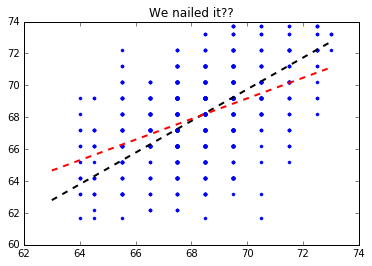

In [296]:
plt.plot(father_height,son_height, ".")
plt.title("We nailed it??")
maxim, minim = int(np.max(father_height)), int(np.min(father_height))
xvals = [vec for vec in np.array(range(minim-1, maxim+1)) ]

# Gradient descent solution
yvals = [ w_hat[1]  * xval + w_hat[0] for xval in xvals]

# solution from closed form
yvals2 = [ w_hat_lstsq[1]  * xval + w_hat_lstsq[0] for xval in xvals]

plt.plot(xvals, yvals, '--', c='k',linewidth=2)
plt.plot(xvals, yvals2, '--', c='r',linewidth=2)

### Add jitter to  see points that are "superposed"

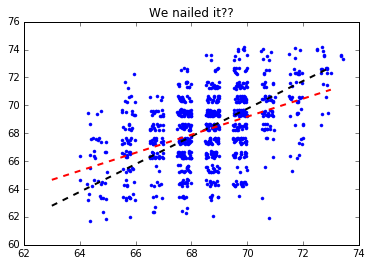

In [398]:
plt.plot(father_height+np.random.random(father_height.shape)/2.,
         son_height+np.random.random(father_height.shape)/2., ".")
plt.title("We nailed it??")
maxim, minim = int(np.max(father_height)), int(np.min(father_height))
xvals = [vec for vec in np.array(range(minim-1, maxim+1)) ]

# Gradient descent solution
yvals = [ w_hat[1]  * xval + w_hat[0] for xval in xvals]

# solution from closed form
yvals2 = [ w_hat_lstsq[1]  * xval + w_hat_lstsq[0] for xval in xvals]

plt.plot(xvals, yvals, '--', c='k',linewidth=2)
plt.plot(xvals, yvals2, '--', c='r',linewidth=2)

## Checking gradient

In [460]:
import sys
import lxmls.readers

galton_data = galton.load()
fathers = galton_data[:,0]
sons = galton_data[:,1]

print fathers.mean(), fathers.std()
print sons.mean(), sons.std()
print galton_data.ravel().mean(), galton_data.ravel().std()

import numpy as np
from scipy import optimize

x = np.hstack([fathers[:, None], np.ones([fathers.shape[0], 1])])
y = sons[:, None]
w = np.array([[0.96], [0.4]]).reshape(2,1)

68.3081896552 1.78637013924
68.0884698276 2.51658435116
68.1983297414 2.18500039728


In [486]:
def error(x, y, w):
    """
    MSE
    """
    predictions = np.dot(x, w)
    return np.mean((predictions-y)**2)


def error_grad(x, y, w):
    """
    Gradient for error w.r.t. w
    """
    assert x.ndim == 2, 'x should be a matrix'    
    assert y.ndim == 2, 'y should be a matrix'
    assert w.ndim == 2, 'w should be a matrix'
    num_features = x.shape[1]
    grad = np.zeros([num_features, 1])
    for j in range(num_features):
        grad[j] = np.mean(2*(np.dot(x, w)-y)*x[:, [j]], axis=0)
    return grad


def num_grad_w(func, w,e = 1e-5):
#def num_grad_w(func, w, e = 1e-5, **kwargs):
    """
    Compute the gradient of the func with respect to w.
    
    The function returns a gradient vector of the same size as w
    """
    dim = w.shape[0]
    grads = []
    perturbation_vector  = np.zeros(w.shape)
    
    for i in range(dim):
        # Perturbate the current dimension
        perturbation_vector[i] = e
        
        # Compute the slope: (point+epsilon - point-epsilon)/2epsilon
        err_a = func(x, y, w + perturbation_vector)
        err_b = func(x, y, w - perturbation_vector)
        grad = (err_a - err_b) / (2*e)
        #perturbation_vector[i] = 0

        grads.append(grad)
    return np.array(grads).reshape(w.shape)

In [487]:
np.random.random(123)
weights = np.random.random((num_features,1))

In [488]:
error_grad(ones_X, son_height, weights)

array([[  -31.33644117],
       [-2139.79476767]])

In [489]:
compute_gradient(ones_X, son_height, weights)

array([[  -31.33644117],
       [-2139.79476767]])

In [490]:
num_grad_w(error,  weights)

array([[-5983.56292552],
       [-6071.13130885]])

In [ ]:
# NO see

In [ ]:
def numerical_grad(X, Y, weights, epsilon = 0.00001):
    num_features = X.shape[1]
    
    Y_hat_plus = predict(X,weights + epsilon)
    Y_hat_minus = predict(X,weights - epsilon)

    numerical_grad = (compute_cost(Y, Y_hat_plus) - compute_cost(Y, Y_hat_minus))/ (2*epsilon)
    
    #numerical_grad = np.zeros(num_features)
    #for j in range(num_features):
    #    w_plus = w
    #    w_plus[j] += epsilon
    #    w_minus = w
    #    w_minus[j] -= epsilon
    #    cost_plus = compute_cost(X, Y, w_plus)
    #    cost_minus = compute_cost(X, Y, w_minus)
    #    numerical_grad[j] = (cost_plus - cost_minus) / (2 * epsilon)
    return numerical_grad

In [ ]:
def grad_checking(grad, numerical_grad, epsilon=0.00001):
    diff = np.linalg.norm(grad - numerical_grad)
    return diff

In [ ]:
np.random.seed(123)
w = np.random.random((2,1))

grad = compute_grad(ones_X, son_height, w)
grad

In [ ]:
num_grad = numerical_grad(ones_X, son_height, w)
num_grad

In [ ]:
grad_checking(ones_X, son_height, np.random.random(2))

In [159]:
# given w_j
cost_evolution = []
def gradient_descent(num_iterations, X, Y, learning_rate=0.001):
    # add column full of ones to X this allow us to take into 
    # account an offset (or bias) term for the linear model
    X = np.hstack((np.ones((X.shape[0],1)), X))
        
    num_features = X.shape[1] 
    num_examples = X.shape[0]
    weights = np.random.random(num_features)
    
    for it in range(num_iterations):
        weights = weights - learning_rate * compute_grad(X, Y, weights)
        cost = compute_cost(X,Y,weights)
        cost_evolution.append(cost)
        sys.stdout.write("\rcost iter " +  str(it) + " is: " + str(cost[0]) )
        sys.stdout.flush()
        
    w_hat = weights
    return w_hat

In [160]:
w_hat = gradient_descent(10, father_height, son_height)

> <ipython-input-35-8fd3d02ee747>(21)compute_grad()
-> grad[j] = compute_partial_error_wrt_j(X, Y, weights, j )


KeyboardInterrupt: 

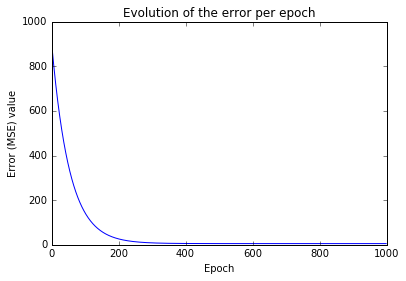

In [127]:
plt.plot(cost_evolution)
plt.title("Evolution of the error per epoch")
plt.ylabel("Error (MSE) value")
plt.xlabel("Epoch")

#### Use the np.linalg.lstsq function and compare to your solution.

In [158]:
w_hat

array([[ 0.23334687],
       [ 0.99309302]])

In [157]:
w_hat_lstsq = np.linalg.lstsq(ones_X, son_height)[0]
w_hat_lstsq

array([[ 23.94153018],
       [  0.64629058]])

#### plot the regression line